In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('./experimental_result/accuracy.csv')
df2 = pd.read_csv('./experimental_result/memory_used.csv')
df3 =pd.read_csv('./experimental_result/GFLOPs.csv')

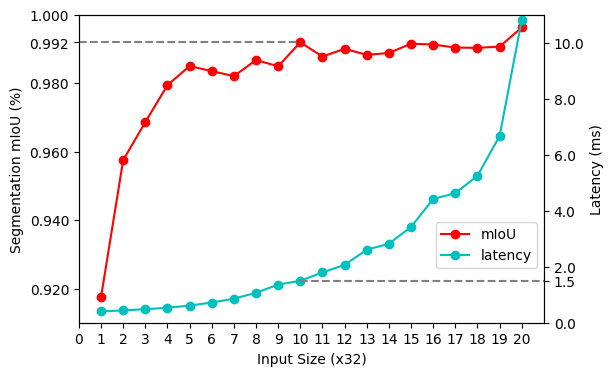

In [75]:
fig, axs = plt.subplots(figsize=(6, 4))
accuracy_at_x10 = df.loc[df['size'] == 320, 'accuracy'].values[0]
latency_at_x10 = df2.loc[df2['size'] == 320, 'latency'].values[0]
# Plot accuracy data
accuracy_plot, = axs.plot(df['size'] / 32, df['accuracy'], 'o-r',label="mIoU")
axs.set_ylabel('Segmentation mIoU (%)')
axs.set_yticks(np.array([0.9,0.92,0.94,0.96,0.98,accuracy_at_x10,1.0]))
axs.tick_params(axis='y', )
axs.set_ylim(0.91, 1)

# Create a secondary y-axis
axs2 = axs.twinx()

# Plot latency data
latency_plot, =axs2.plot(df2['size'] / 32, df2['latency'], 'o-c',label="latency")
axs2.set_ylabel('Latency (ms)')

axs2.tick_params(axis='y')
axs2.set_yticks(np.array([0,latency_at_x10,2,4,6,8,10]))
axs2.set_ylim(0, 11)
axs.set_xticks(np.linspace(0, 20, 21))
axs.set_xlim(0,21)

# Add dotted lines at x=10 for accuracy and latency

axs.set_xlabel('Input Size (x32)')
axs.plot([0,10], [accuracy_at_x10, accuracy_at_x10], '--',color='gray')
axs2.plot([10, 21], [latency_at_x10, latency_at_x10], '--',color='gray')

axs.legend(handles=[accuracy_plot, latency_plot], bbox_to_anchor=(1.0,0.35))
# axs.annotate('Latency', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='blue')
plt.show()

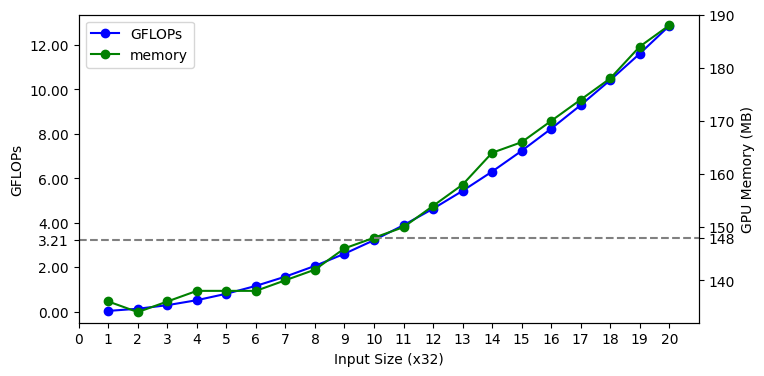

In [71]:
fig, axs = plt.subplots(figsize=(8, 4))
gFLOPs_at_x10 = df3.loc[df3['size'] == 320, 'GFLOPs'].values[0]
mem_at_x10 = df2.loc[df2['size'] == 320, 'gpu_memory_used'].values[0]
# Plot accuracy data
gflops_plot, = axs.plot(df3['size'] / 32, df3['GFLOPs'], 'o-b', label='GFLOPs')
axs.set_ylabel('GFLOPs')
# axs.set_yticks(np.array([0.9,0.92,0.94,0.96,0.98,accuracy_at_x10,1.0]))
axs.set_yticks(np.array([0,2,4,gFLOPs_at_x10,6,8,10,12]))
axs.tick_params(axis='y', )
axs.set_ylim(-0.5, df3['GFLOPs'].max()+0.5)

# Create a secondary y-axis
axs2 = axs.twinx()

# Plot Memory data
mem_plot, =axs2.plot(df2['size']/32,df2['gpu_memory_used'],'o-g', label='memory')
axs2.set_ylabel('GPU Memory (MB)')
axs2.set_xlabel('input size (x32)')
axs2.set_yticks(np.array([130,140,150,160,170,180,190,mem_at_x10]))

axs2.set_ylim(df2['gpu_memory_used'].min()-2, df2['gpu_memory_used'].max()+2)
axs2.set_xlim(0,21)
axs.set_xticks(np.linspace(0, 20, 21))
# Add dotted lines at x=10 for accuracy and latency

axs.set_xlabel('Input Size (x32)')
axs.plot([0,10], [gFLOPs_at_x10, gFLOPs_at_x10], '--',color='gray')
axs2.plot([10, 21], [mem_at_x10, mem_at_x10], '--',color='gray')
axs.legend(handles=[gflops_plot, mem_plot])

plt.show()